# Business Understanding

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this is to predict the final price of each home.

# Data Mining

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [4]:
train_data.shape

(1259, 81)

In [5]:
test_data.shape

(201, 80)

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
4,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal


In [8]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [11]:
#combining train and test data
data=pd.concat([train_data,test_data])

In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
data.shape

(1460, 81)

In [14]:
data=data.reset_index()

In [15]:
#there may be a chance to get duplicate values
data[data.index.duplicated()]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [16]:
#need to remove duplicates
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(1460, 82)

# Data Cleaning

In [18]:
pd.set_option('display.max_rows', 82)
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
SalePrice         201
GarageType         81
GarageYrBlt        81
GarageQual         81
GarageCond         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
TotRmsAbvGrd        0
PoolArea            0
Functional          0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
KitchenQual         0
Fireplaces          0
ScreenPorch         0
SaleCondition       0
SaleType            0
YrSold              0
LowQualFinSF        0
GarageCars          0
GarageArea          0
MoSold              0
MiscVal             0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
GrLivArea 

In [19]:
#converting these null values to percentage
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
SalePrice        13.767123
GarageType        5.547945
GarageYrBlt       5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
TotRmsAbvGrd      0.000000
PoolArea          0.000000
Functional        0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
LowQualFinSF      0.000000
GarageCars        0.000000
G

In [20]:
data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [21]:
data.shape

(1460, 78)

In [22]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False).head(20)

FireplaceQu     47.260274
LotFrontage     17.739726
SalePrice       13.767123
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
MoSold           0.000000
PavedDrive       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
dtype: float64

In [23]:
data.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [24]:
data.GarageQual=data.GarageQual.fillna('TA')

In [25]:
data.GarageQual.isnull().sum()

0

In [26]:
data.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [27]:
data.GarageCond=data.GarageCond.fillna('TA')

In [28]:
data.GarageCond.isnull().sum()

0

In [29]:
data.GarageYrBlt.mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

In [30]:
data.GarageYrBlt=data.GarageYrBlt.fillna(2005.0)

In [31]:
data.GarageYrBlt.isnull().sum()

0

In [32]:
data.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [33]:
data.GarageFinish=data.GarageFinish.fillna('Unf')

In [34]:
data.GarageFinish.isnull().sum()

0

In [35]:
data.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [36]:
data.GarageType=data.GarageType.fillna('Attchd')

In [37]:
data.BsmtFinType2.mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [38]:
data.BsmtFinType2=data.BsmtFinType2.fillna('Unf')

In [39]:
data.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [40]:
data.BsmtExposure=data.BsmtExposure.fillna('No')

In [41]:
data.BsmtFinType1.mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [42]:
data.BsmtFinType1=data.BsmtFinType1.fillna('Unf')

In [43]:
data.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [44]:
data.BsmtQual=data.BsmtQual.fillna('TA')

In [45]:
data.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [46]:
data.BsmtCond=data.BsmtCond.fillna('TA')

In [47]:
data.MasVnrType.mode()

0    None
Name: MasVnrType, dtype: object

In [48]:
data.MasVnrType=data.MasVnrType.fillna('None')

In [49]:
data.MasVnrArea.mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [50]:
data.MasVnrArea=data.MasVnrArea.fillna(0.0)

In [51]:
data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [52]:
data.Electrical=data.Electrical.fillna('SBrkr')

In [53]:
data.isnull().sum().sort_values(ascending=False).head()

FireplaceQu    690
LotFrontage    259
SalePrice      201
HalfBath         0
Fireplaces       0
dtype: int64

In [54]:
le=LabelEncoder()
data['FireplaceQu']=le.fit_transform(data['FireplaceQu'])

In [55]:
def fillingNullValues(col, typedata):
    for dataset in train_data:
        mean=data[col].mean()
        std=data[col].std()
        sizeofnull=data[col].isnull().sum()
        randcol=np.random.randint(mean-std,mean+std,size=sizeofnull)
        col_copied=data[col].copy()
        col_copied[np.isnan(col_copied)]=randcol
        data[col]=col_copied
        data[col]=data[col].astype(typedata)

In [56]:
data.FireplaceQu.dtype

dtype('int32')

In [57]:
fillingNullValues("FireplaceQu", int)

In [58]:
data.FireplaceQu.isnull().sum()

0

In [59]:
data.LotFrontage.dtype

dtype('float64')

In [60]:
fillingNullValues("LotFrontage", float)

In [61]:
data.LotFrontage.isnull().sum()

0

In [62]:
data.SalePrice.dtype

dtype('float64')

In [63]:
fillingNullValues("SalePrice", float)

In [64]:
data.SalePrice.isnull().sum()

0

In [65]:
data.isnull().sum().sort_values(ascending=False)

index            0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
BsmtHalfBath     0
GarageType       0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
FireplaceQu      0
GarageYrBlt      0
Id               0
3SsnPorch        0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
GarageFinish     0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
LotConfig        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
Utilities        0
BsmtUnfSF        0
LandContour      0
LotShape    

# Exploratory Data Analysis

In [66]:
#Univariate

In [67]:
data[["SalePrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180838.641096,76949.916538,34900.0,130000.0,164945.0,215000.0,755000.0


In [68]:
report=sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [69]:
report.show_html("report.html")

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


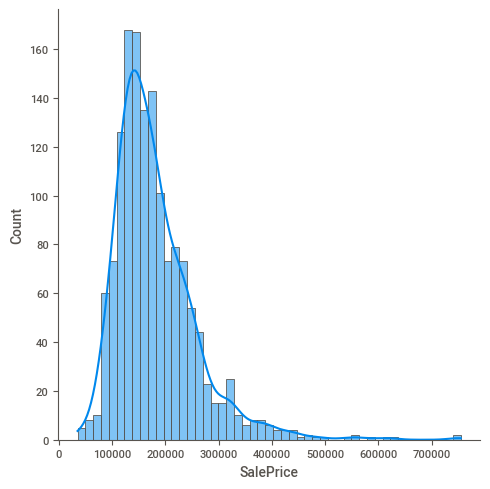

In [70]:
sns.displot(data['SalePrice'],kde=True)

In [71]:
data.SalePrice.skew()

1.9543309181489716

<AxesSubplot:xlabel='SalePrice'>

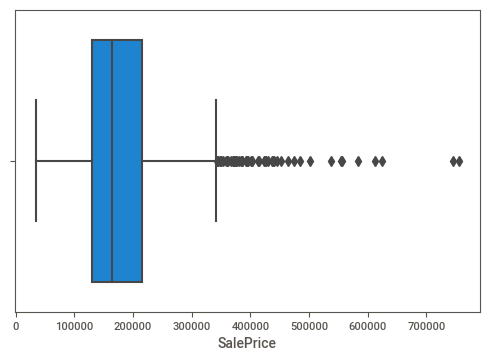

In [72]:
sns.boxplot(data['SalePrice'])

In [73]:
def removeOutliers(col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    uf=q3+1.5*iqr
    lf=q1-1.5*iqr
    
    ind1=data[data[col]>uf].index
    ind2=data[data[col]<lf].index
    
    data.drop(ind1,axis=0,inplace=True)
    data.drop(ind2,axis=0,inplace=True)

In [74]:
removeOutliers('SalePrice')

<AxesSubplot:xlabel='SalePrice'>

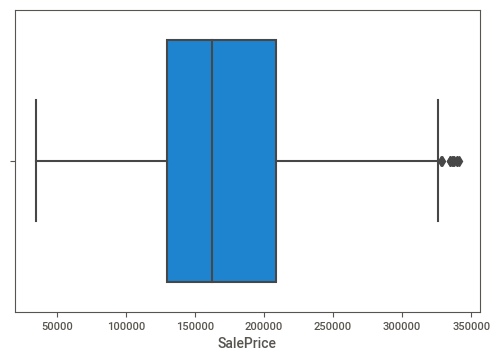

In [75]:
sns.boxplot(data['SalePrice'])

In [76]:
data.shape

(1406, 78)

In [77]:
data.SalePrice.skew()

0.6204919912039698

In [78]:
removeOutliers('SalePrice')

In [79]:
data.SalePrice.skew()

0.5594142876840895

<AxesSubplot:xlabel='SalePrice'>

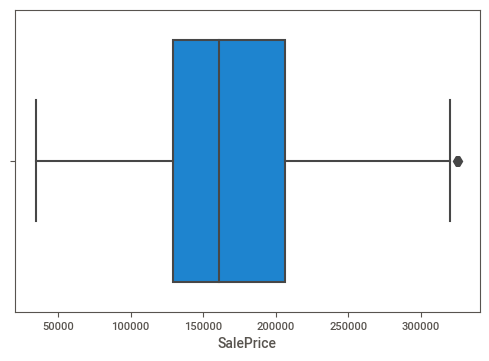

In [80]:
sns.boxplot(data['SalePrice'])

In [81]:
removeOutliers('SalePrice')

<AxesSubplot:xlabel='SalePrice'>

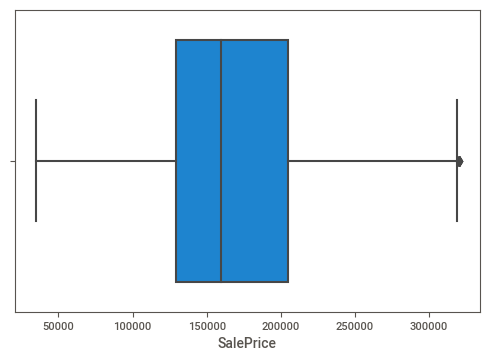

In [82]:
sns.boxplot(data['SalePrice'])

In [83]:
data.shape

(1389, 78)

In [84]:
removeOutliers('SalePrice')

In [85]:
data.shape

(1384, 78)

In [86]:
data.SalePrice.skew()

0.4976899123469357

<AxesSubplot:xlabel='SalePrice'>

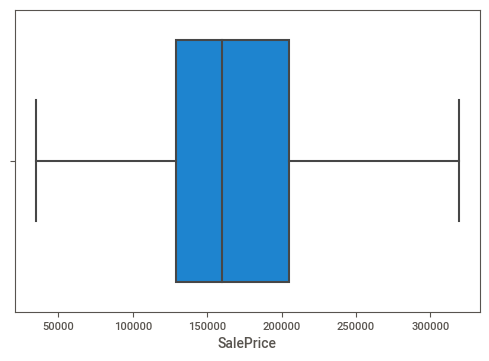

In [87]:
sns.boxplot(data['SalePrice'])

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

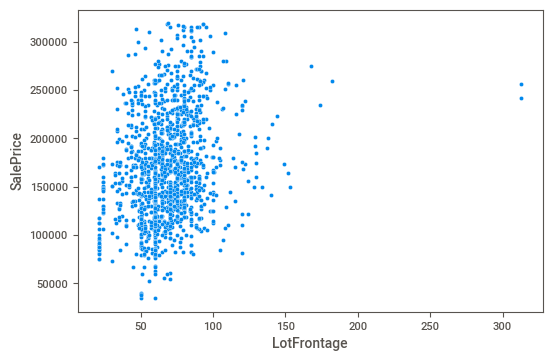

In [88]:
#multivariate Analysis
sns.scatterplot(x='LotFrontage',y='SalePrice',data=data)

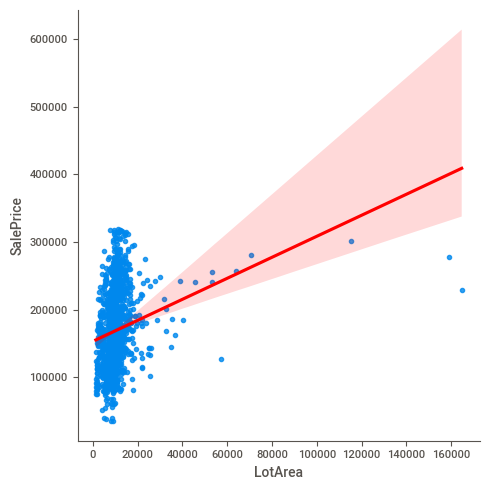

In [89]:
sns.lmplot(x='LotArea',y='SalePrice',data=data,line_kws={'color': 'red'})

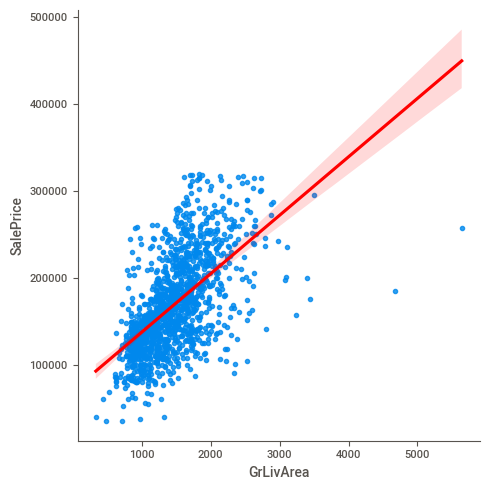

In [90]:
sns.lmplot(x="GrLivArea",y="SalePrice",data=data,line_kws={'color':'red'})

# Data Preprocessing


In [91]:
categorical_features=[i for i in data.columns if data[i].dtypes == 'object']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [92]:
for i in range(1,len(categorical_features)):
    le=LabelEncoder()
    data[categorical_features[i]]=le.fit_transform(data[categorical_features[i]])
    
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,1,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500.0
1,1,2,20,RL,80.0,9600,1,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500.0
2,2,3,60,RL,68.0,11250,1,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500.0
3,3,4,70,RL,60.0,9550,1,0,3,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,4,5,60,RL,84.0,14260,1,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000.0


In [93]:
pd.set_option('display.max_columns', 82)
data.corr()

,index,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
index,1.000000,0.404404,0.011815,-0.003786,-0.031172,-0.019896,0.015589,0.003895,0.027099,0.042713,-0.003453,0.040698,0.004509,0.011342,0.009945,0.035320,-0.038926,0.003495,-0.001490,-0.037607,-0.002600,0.005095,-0.031451,-0.051310,0.030142,-0.092150,0.030883,0.029401,0.024032,0.060869,0.017107,-0.014231,0.002388,-0.027962,0.010409,-0.017614,-0.017231,-0.054086,0.004947,0.039933,0.009076,0.030197,-0.032216,-0.027847,-0.018097,-0.050409,-0.025857,0.007019,-0.035956,-0.005478,0.008230,-0.012786,0.011438,-0.018848,0.002213,-0.048343,0.033545,-0.019897,-0.014309,0.002977,-0.014869,-0.007408,0.035143,0.019571,0.024291,-0.026016,-0.025934,-0.008852,-0.047340,-0.018233,-0.020415,0.007694,0.021246,-0.042839,-0.007811,-0.046949,-0.060071
Id,0.404404,1.000000,0.005604,0.013668,-0.010940,0.010311,0.025929,-0.024815,0.013101,0.052425,0.003149,0.006502,-0.009563,0.004350,0.014992,0.024362,0.003772,0.006803,0.001089,-0.007078,0.050292,-0.004572,-0.027600,-0.033345,0.057702,-0.034367,-0.028028,0.035630,0.018315,0.023032,0.012429,-0.037213,0.015255,0.007192,0.048892,-0.006255,0.005658,0.010892,0.043215,-0.009695,0.015028,0.044215,0.039427,0.018128,-0.038467,0.041748,0.016288,-0.028221,0.021585,0.013129,0.043790,-0.000981,-0.041409,0.059135,0.003864,0.002306,-0.025349,-0.002790,0.012318,-0.028213,0.046748,0.045155,-0.006378,-0.014895,0.011587,-0.011783,0.014849,0.001671,-0.049118,0.005828,0.050080,-0.008026,0.025548,-0.007818,0.012086,0.010010,0.025464
MSSubClass,0.011815,0.005604,1.000000,-0.346153,-0.149888,-0.024643,0.121336,-0.003014,-0.023373,0.083088,-0.029859,0.005887,-0.016096,-0.050881,0.748048,0.399981,0.059983,-0.069929,0.043211,0.052247,-0.109347,-0.033765,-0.087527,-0.139552,-0.022991,0.044688,-0.043188,0.001108,0.067955,-0.078510,-0.014552,-0.079366,0.014690,-0.056987,0.041254,-0.065025,-0.141497,-0.233238,0.049658,0.014198,-0.100611,0.055656,-0.248780,0.318570,0.044583,0.094554,0.011724,-0.009317,0.148059,0.181913,-0.031214,0.283376,-0.010937,0.055879,0.006361,-0.040367,0.041012,0.083898,0.113656,-0.001914,-0.021305,-0.084840,0.013007,0.004781,-0.057949,0.000468,-0.001325,-0.013322,-0.052159,-0.033843,0.007612,-0.008632,-0.015223,-0.024545,0.015743,-0.012867,-0.066266
LotFrontage,-0.003786,0.013668,-0.346153,1.000000,0.300056,-0.045918,-0.131952,-0.098194,0.006438,-0.189769,0.083034,0.066009,-0.008409,-0.007428,-0.389412,0.005097,0.151315,-0.020414,0.065417,0.041522,0.127759,0.074304,0.068247,0.100570,-0.025337,0.116556,-0.114328,0.043448,0.065998,-0.082542,0.039659,-0.085869,-0.023610,0.202171,-0.022897,0.035175,0.086919,0.314836,-0.021469,-0.048192,0.053942,0.039283,0.375466,0.016677,0.035648,0.301500,0.066739,0.009949,0.124040,0.005963,0.212988,0.011429,-0.120965,0.263171,0.009445,0.187521,-0.145562,-0.199144,-0.008644,-0.167905,0.207253,0.266477,0.050910,0.028318,0.070992,0.031676,0.098725,0.019067,0.061340,0.033993,0.148824,0.029980,0.007926,0.020029,-0.036750,0.030655,0.257582
LotArea,-0.031172,-0.010940,-0.149888,0.300056,1.000000,-0.245042,-0.186189,-0.158281,0.013666,-0.149965,0.419396,-0.004900,0.029000,0.017099,-0.233899,-0.047714,0.069251,0.006098,-0.000668,0.010960,0.033769,0.151747,0.039228,0.019484,-0.009268

<AxesSubplot:>

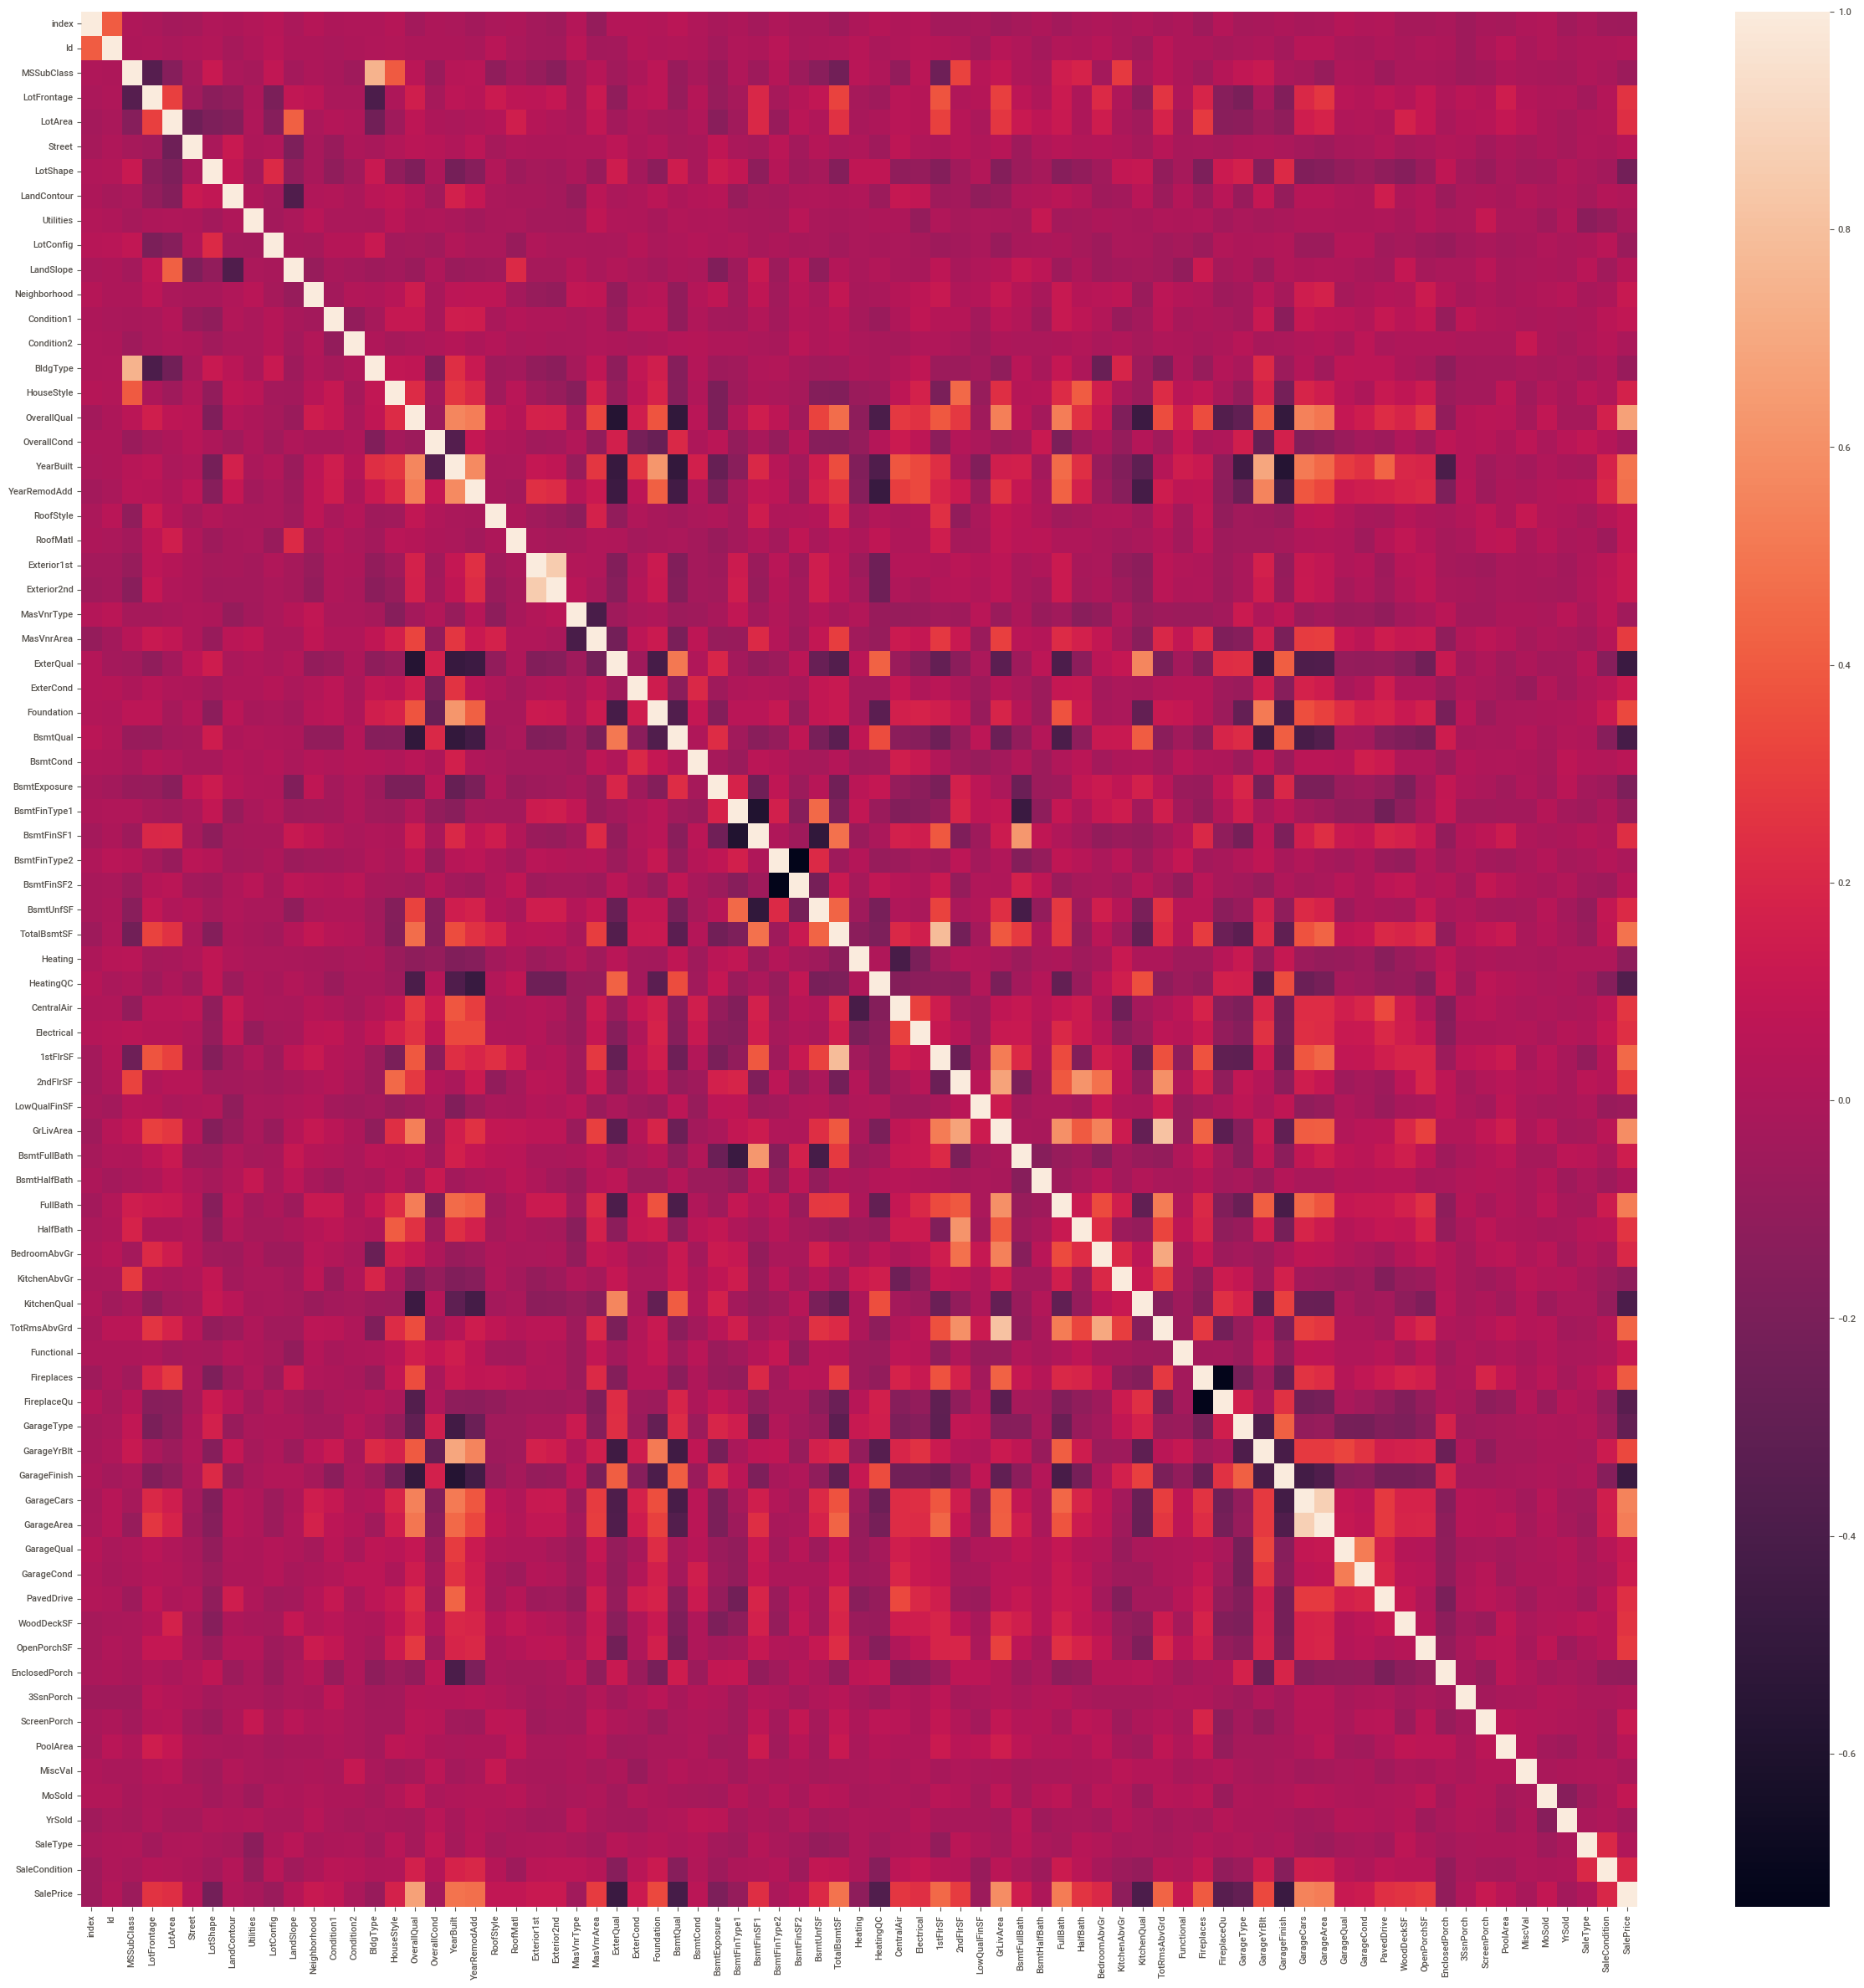

In [94]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr())

In [95]:
categorical_features=[i for i in data.columns if data[i].dtypes == 'object']
categorical_features


['MSZoning']

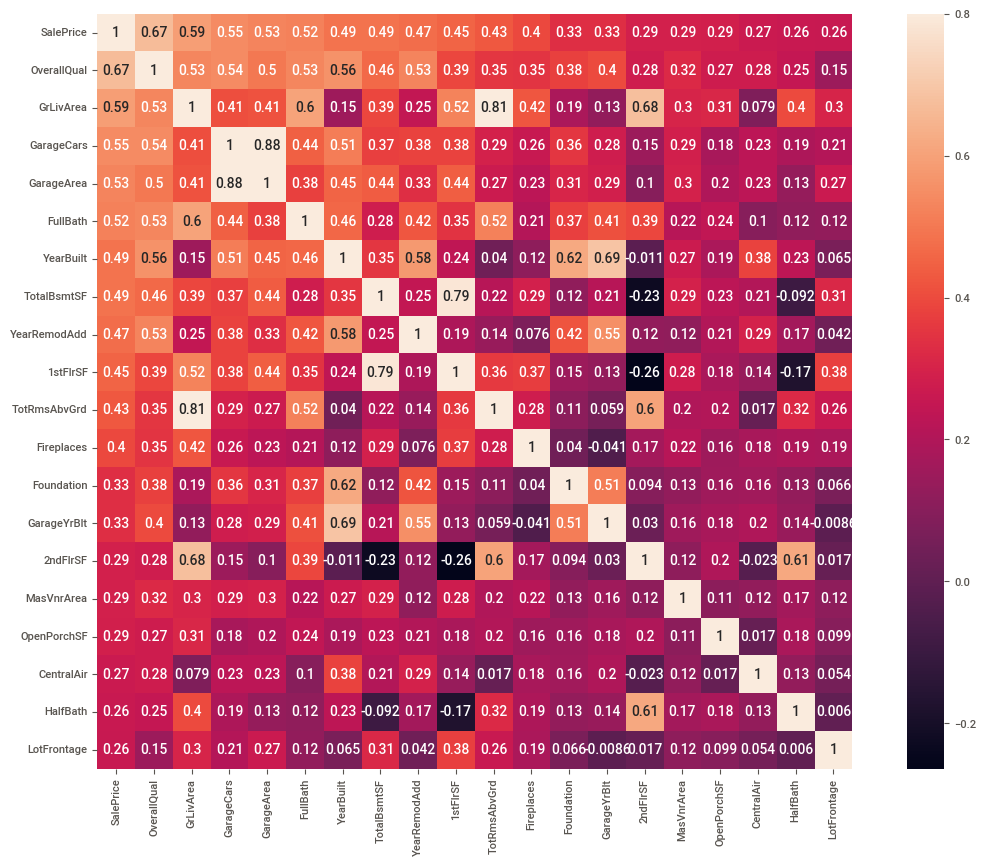

In [96]:
k = 20 #number of variables for heatmap
cols =data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data[cols].corr(), vmax=.8, square=True,annot=True, fmt='.2g');

In [97]:
data.drop('MSZoning',inplace=True,axis=1)

# Feature Engineering

In [98]:
x=data.loc[:,['OverallQual','GrLivArea','GarageArea','YearBuilt','1stFlrSF','TotRmsAbvGrd','Fireplaces','Foundation','MasVnrArea','CentralAir','PavedDrive']]
y=data.loc[:,'SalePrice']

In [99]:
x.shape

(1384, 11)

In [100]:
y.shape

(1384,)

In [101]:
x.head()

,OverallQual,GrLivArea,GarageArea,YearBuilt,1stFlrSF,TotRmsAbvGrd,Fireplaces,Foundation,MasVnrArea,CentralAir,PavedDrive
0,7,1710,548,2003,856,8,0,2,196.0,1,2
1,6,1262,460,1976,1262,6,1,1,0.0,1,2
2,7,1786,608,2001,920,6,1,2,162.0,1,2
3,7,1717,642,1915,961,7,1,0,0.0,1,2
4,8,2198,836,2000,1145,9,1,2,350.0,1,2


In [102]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

# Model Prediction

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [104]:
x_train.shape

(1107, 11)

In [105]:
x_test.shape

(277, 11)

In [106]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [107]:
x_train

array([[-0.73786043, -1.39348461, -2.20567203, ..., -0.57196788,
         0.27532117, -1.64465852],
       [-0.73786043, -0.41207392, -0.51524697, ..., -0.57196788,
         0.27532117,  0.30046646],
       [ 0.04678078, -0.66560501, -0.75673626, ..., -0.57196788,
         0.27532117,  0.30046646],
       ...,
       [ 2.4007044 ,  1.02732843,  1.5132631 , ..., -0.17461961,
         0.27532117,  0.30046646],
       [ 0.04678078, -0.74330002,  0.57628464, ..., -0.57196788,
         0.27532117,  0.30046646],
       [ 1.61606319,  3.59944229,  1.01096537, ...,  2.91386008,
         0.27532117,  0.30046646]])

In [108]:
x_test

array([[ 0.04678078, -0.34460193,  0.13194434, ...,  0.02405452,
         0.27532117,  0.30046646],
       [-1.52250164, -1.54887463, -2.20567203, ..., -0.57196788,
        -3.63212165, -3.58978349],
       [-0.73786043, -0.1135615 , -0.82435326, ..., -0.57196788,
         0.27532117,  0.30046646],
       ...,
       [-0.73786043, -1.19311326,  0.6921995 , ..., -0.57196788,
         0.27532117,  0.30046646],
       [-0.73786043, -0.86188715, -0.71809798, ..., -0.57196788,
         0.27532117,  0.30046646],
       [-0.73786043, -0.66560501,  0.13194434, ..., -0.05421105,
         0.27532117,  0.30046646]])

In [109]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [110]:
y_pred_lr=lr.predict(x_test)

In [111]:
y_pred_lr

array([170450.96731277,  72449.66704442, 151826.23407217, 136789.34695499,
       166524.93683161, 160264.59830734, 215283.0845405 , 153952.32758926,
       175858.7848368 , 168861.16577459, 204552.98786486,  90827.71126723,
       193807.63774206, 161244.82396666, 174037.13569331, 120105.3836407 ,
       199268.33033789, 151603.95949506, 217768.73079857, 201516.4640677 ,
       159708.73844594, 124440.37107428, 236508.17859691, 112739.97340173,
       238570.75644329, 248896.4351781 , 128485.60974255, 159324.25980763,
       135216.59001244, 165186.04827089, 199925.292965  , 200504.43654055,
       166704.91682631, 136083.07585015, 129679.57992424, 159704.72305697,
       188932.51987805, 194786.81493844, 186260.59417039, 212501.28002064,
       196793.68609863, 133797.91518639, 136632.2538017 ,  77887.0985161 ,
       189470.33988055, 111190.53119532, 194720.92485164, 257630.69112137,
       123705.78489879, 201537.97230077, 131097.10977906, 195704.5371908 ,
       247910.20617437, 1

In [112]:
y_test

810     181000.0
495      34900.0
626     139900.0
1392    256716.0
144     125000.0
          ...   
450     110000.0
1416    164775.0
396     123000.0
331     139000.0
1290    136530.0
Name: SalePrice, Length: 277, dtype: float64

In [113]:
mean_absolute_error(y_test,y_pred_lr)

24112.595398672307

In [114]:
r2_score(y_test,y_pred_lr)

0.6137379847484845

In [115]:
#knn Regressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [116]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([169700. , 116618.2, 146690. , 137600. , 143881. , 169468.2,
       264249.4, 151585. , 186727.8, 174696.2, 204859.2, 126767.6,
       202400. , 151400. , 160000. , 127980. , 192428. , 172978. ,
       213280. , 202200. , 168725. , 122500. , 285771.8, 154038.8,
       241261.6, 237952.8, 132179. , 141817. , 129580. , 138200. ,
       191520. , 196376.2, 152370. , 144760.6, 176315.6, 148904.4,
       186144.2, 179430. , 172060. , 159118.6, 209200. , 133356.8,
       107300. , 127949.8, 192595.4, 120800. , 193580. , 269128. ,
       150067.2, 201120.6, 132454.6, 200789.2, 298200. , 116480. ,
       122561.2, 166760. , 220200. , 150900. , 140543. , 203480. ,
       226385.4, 183203.8, 196300. , 250796.4, 139830. , 189276.2,
       191563. , 200400. ,  84500. , 136460.2, 172915. , 158533.2,
       171490. , 151167.4, 177751.6, 131801.6, 196600. , 181407.2,
       166937.6, 135094.4, 155664.8, 122895. , 108671. , 173503.8,
       180620. , 192820. ,  87500. , 177480. , 167570.4, 24863

In [117]:
r2_score(y_test,y_pred_knn)

0.548357624560788

In [118]:
mean_absolute_error(y_test,y_pred_knn)

25623.358844765346

In [119]:
#Decision Tree
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [120]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([180000., 149963., 169500., 122000., 136905., 112000., 221500.,
       171900., 164000., 158000., 192500., 130000., 226000., 171000.,
       129500., 127500., 275000., 140000., 250000., 219500., 111848.,
       112500., 312500., 127000., 285000., 287000., 152000., 171000.,
       127000., 129500., 217333., 192000., 121646., 176000., 148000.,
       149023., 226721., 178000., 115719., 275000., 187100., 136500.,
       130000., 149963., 194500., 135000., 194500., 290000., 147000.,
       212000., 100000., 205950., 309000., 178400., 112731., 144000.,
       226000., 148000., 116965., 173000., 236500., 168500., 185000.,
       226000., 125000., 186700., 172500., 185000.,  84500., 129900.,
       157500., 193500., 194000., 168500., 139500., 129500., 250000.,
       155951., 165000., 145000., 153337., 128000.,  78000., 173000.,
       239799., 209500., 108000., 158000., 151000., 226000., 143000.,
       221039., 149500., 141000., 110000.,  97500., 185000., 146500.,
       182000., 1507

In [121]:
r2_score(y_test,y_pred_dt)

0.24453711123632715

In [122]:
mean_absolute_error(y_test,y_pred_dt)

32298.296028880868

In [123]:
#Random Forest Classifier
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [124]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([158971.56      , 116875.23666667, 161244.61      , 122341.39      ,
       148673.85      , 170828.84      , 209970.16      , 144302.39      ,
       190507.40833333, 153604.57      , 197174.25      , 114941.96      ,
       211227.11      , 159079.63      , 187540.68      , 120101.01      ,
       237074.54      , 158687.33      , 205593.3       , 218616.1       ,
       151046.87      , 118563.91      , 284808.5       , 129681.69      ,
       249278.91      , 262990.61      , 152090.35      , 140008.66      ,
       122637.        , 163212.74      , 189988.8       , 187046.37      ,
       164663.95      , 143342.3       , 142457.46      , 148400.24      ,
       198272.64      , 181876.03      , 164718.58      , 216007.15      ,
       195471.68      , 127733.44      , 135434.84      ,  75862.05      ,
       190582.97      , 110483.46      , 183852.77      , 282697.1       ,
       146769.56      , 210237.09      , 127348.07      , 200350.73      ,
       283226.81      , 1

In [125]:
r2_score(y_test,y_pred_rf)

0.5721928364090484

In [126]:
mean_absolute_error(y_test,y_pred_rf)

24297.14453670277

In [127]:
#support vector machine
svreg=SVR()
svreg.fit(x_train,y_train)

SVR()

In [128]:
y_pred_sv=svreg.predict(x_test)

In [129]:
r2_score(y_test,y_pred_sv)

-0.011465581997115226

In [130]:
mean_absolute_error(y_test,y_pred_sv)

43743.050753318406

In [131]:
#Simple Linear Regression shows consistent result
#Applying Gradient Descent to get least cost function value
#cost function
def costfunction(x,y,w,b):
    cost=np.sum(((x.dot(w)+b)-y)**2/(2*len(y)))
    return cost
#w=m_curr and b=b_curr
def GradientDescent(x,y,w,b,learningrate,epochs):
    cost_list=[0]*epochs
    for epoch in range(epochs):
        z=x.dot(w)+b
        loss=z-y
        weight_gradient=(x.T.dot(loss))/len(y)
        bias_gradient=(np.sum(loss))/len(y)
        w=w-learningrate*weight_gradient
        b=b-learningrate*bias_gradient
        cost=costfunction(x,y,w,b)
        cost_list[epoch]=cost
        
#         if(epoch%(epochs/10)==0):
        print("cost is: ",float(cost))
            
    return w,b,cost_list

In [132]:
w,b,c=GradientDescent(x_train,y_train,np.zeros(x_train.shape[1]),0,0.1,epochs=400)

cost is:  12540421999.244356
cost is:  10146242491.971062
cost is:  8290798724.042466
cost is:  6818792160.48152
cost is:  5637771611.056424
cost is:  4685200945.003672
cost is:  3915000054.7928114
cost is:  3291538068.944893
cost is:  2786580992.1685786
cost is:  2377490948.721345
cost is:  2046016414.4397914
cost is:  1777404523.8457975
cost is:  1559716227.8231604
cost is:  1383284253.6611133
cost is:  1240278760.5238068
cost is:  1124357268.9044757
cost is:  1030381752.3613682
cost is:  954189721.2555639
cost is:  892408887.1213596
cost is:  842307070.0735762
cost is:  801670631.5835985
cost is:  768706004.7947092
cost is:  741959930.9636518
cost is:  720254846.9594057
cost is:  702636544.9833336
cost is:  688331772.953739
cost is:  676713887.1054246
cost is:  667275027.1938744
cost is:  659603575.3197681
cost is:  653365894.7820835
cost is:  648291536.0298697
cost is:  644161251.2167504
cost is:  640797283.953625
cost is:  638055502.1799804
cost is:  635819024.1488291
cost is:  63

cost is:  624925465.1149526
cost is:  624925463.6671884
cost is:  624925462.2591325
cost is:  624925460.8896954
cost is:  624925459.557818
cost is:  624925458.2624704
cost is:  624925457.0026505
cost is:  624925455.7773837
cost is:  624925454.5857226
cost is:  624925453.4267453
cost is:  624925452.2995555
cost is:  624925451.2032814
cost is:  624925450.1370747
cost is:  624925449.1001112
cost is:  624925448.0915886
cost is:  624925447.1107271


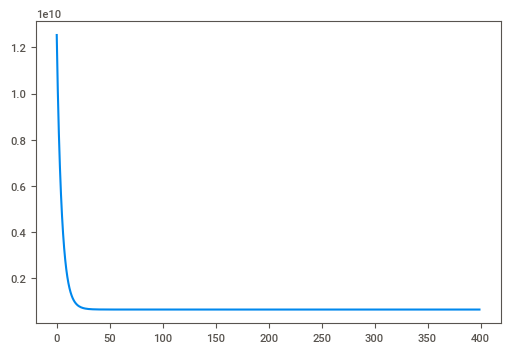

In [133]:
plt.plot(c)

In [134]:
def predict(x,w,b):
    return x.dot(w)+b

y_pred=predict(x_test,w,b)
y_pred

array([170446.82734785,  72446.76180685, 151823.69112427, 136800.42667504,
       166545.73721198, 160266.90864722, 215294.3247263 , 153961.18256741,
       175845.34109972, 168870.01765193, 204559.44572296,  90834.01798378,
       193807.61208581, 161253.56231666, 174030.95204282, 120102.42846218,
       199256.36274295, 151596.60002382, 217751.80169138, 201512.84312562,
       159694.1303994 , 124442.32007018, 236512.81005141, 112730.66531851,
       238571.79282091, 248898.07549869, 128482.14633344, 159323.60959453,
       135226.50484111, 165184.86563661, 199921.21911671, 200506.65514234,
       166701.04307454, 136081.58299301, 129677.83553681, 159696.31176249,
       188927.24293599, 194780.5533818 , 186247.9537503 , 212516.56667442,
       196802.56358302, 133795.76697634, 136626.18288927,  77891.21816154,
       189476.63473915, 111186.61402356, 194726.74656634, 257616.11487916,
       123711.9450211 , 201529.46384952, 131092.82090276, 195692.56573046,
       247901.56993971, 1

In [135]:
r2_score(y_test,y_pred)

0.6137119068875048